In \[1\]:

    %matplotlib inline
    import numpy as np 
    import pandas as pd
    import seaborn as s
    from sklearn import model_selection
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
    from sklearn import svm
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    #optimum parameter choosing 
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC
    from xgboost import XGBClassifier
    import pickle
    import os 
    import warnings
    warnings.filterwarnings('ignore')

    C:\Users\bhagy\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
      from pandas import MultiIndex, Int64Index

In \[2\]:

    os.chdir ('C:\\Users\\bhagy\\Downloads\\Compressed\Acmegrade Machine Learning April Files\\ML Day18 3\\PRJ Cancer Prediction')
    data = pd.read_csv('data.csv')
    data

Out\[2\]:

|     | id       | diagnosis | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave points_mean | ... | radius_worst | texture_worst | perimeter_worst | area_worst | smoothness_worst | compactness_worst | concavity_worst | concave points_worst | symmetry_worst | fractal_dimension_worst |
|-----|----------|-----------|-------------|--------------|----------------|-----------|-----------------|------------------|----------------|---------------------|-----|--------------|---------------|-----------------|------------|------------------|-------------------|-----------------|----------------------|----------------|-------------------------|
| 0   | 842302   | M         | 17.99       | 10.38        | 122.80         | 1001.0    | 0.11840         | 0.27760          | 0.30010        | 0.14710             | ... | 25.380       | 17.33         | 184.60          | 2019.0     | 0.16220          | 0.66560           | 0.7119          | 0.2654               | 0.4601         | 0.11890                 |
| 1   | 842517   | M         | 20.57       | 17.77        | 132.90         | 1326.0    | 0.08474         | 0.07864          | 0.08690        | 0.07017             | ... | 24.990       | 23.41         | 158.80          | 1956.0     | 0.12380          | 0.18660           | 0.2416          | 0.1860               | 0.2750         | 0.08902                 |
| 2   | 84300903 | M         | 19.69       | 21.25        | 130.00         | 1203.0    | 0.10960         | 0.15990          | 0.19740        | 0.12790             | ... | 23.570       | 25.53         | 152.50          | 1709.0     | 0.14440          | 0.42450           | 0.4504          | 0.2430               | 0.3613         | 0.08758                 |
| 3   | 84348301 | M         | 11.42       | 20.38        | 77.58          | 386.1     | 0.14250         | 0.28390          | 0.24140        | 0.10520             | ... | 14.910       | 26.50         | 98.87           | 567.7      | 0.20980          | 0.86630           | 0.6869          | 0.2575               | 0.6638         | 0.17300                 |
| 4   | 84358402 | M         | 20.29       | 14.34        | 135.10         | 1297.0    | 0.10030         | 0.13280          | 0.19800        | 0.10430             | ... | 22.540       | 16.67         | 152.20          | 1575.0     | 0.13740          | 0.20500           | 0.4000          | 0.1625               | 0.2364         | 0.07678                 |
| ... | ...      | ...       | ...         | ...          | ...            | ...       | ...             | ...              | ...            | ...                 | ... | ...          | ...           | ...             | ...        | ...              | ...               | ...             | ...                  | ...            | ...                     |
| 564 | 926424   | M         | 21.56       | 22.39        | 142.00         | 1479.0    | 0.11100         | 0.11590          | 0.24390        | 0.13890             | ... | 25.450       | 26.40         | 166.10          | 2027.0     | 0.14100          | 0.21130           | 0.4107          | 0.2216               | 0.2060         | 0.07115                 |
| 565 | 926682   | M         | 20.13       | 28.25        | 131.20         | 1261.0    | 0.09780         | 0.10340          | 0.14400        | 0.09791             | ... | 23.690       | 38.25         | 155.00          | 1731.0     | 0.11660          | 0.19220           | 0.3215          | 0.1628               | 0.2572         | 0.06637                 |
| 566 | 926954   | M         | 16.60       | 28.08        | 108.30         | 858.1     | 0.08455         | 0.10230          | 0.09251        | 0.05302             | ... | 18.980       | 34.12         | 126.70          | 1124.0     | 0.11390          | 0.30940           | 0.3403          | 0.1418               | 0.2218         | 0.07820                 |
| 567 | 927241   | M         | 20.60       | 29.33        | 140.10         | 1265.0    | 0.11780         | 0.27700          | 0.35140        | 0.15200             | ... | 25.740       | 39.42         | 184.60          | 1821.0     | 0.16500          | 0.86810           | 0.9387          | 0.2650               | 0.4087         | 0.12400                 |
| 568 | 92751    | B         | 7.76        | 24.54        | 47.92          | 181.0     | 0.05263         | 0.04362          | 0.00000        | 0.00000             | ... | 9.456        | 30.37         | 59.16           | 268.6      | 0.08996          | 0.06444           | 0.0000          | 0.0000               | 0.2871         | 0.07039                 |

569 rows × 32 columns

In \[3\]:

    data.shape

Out\[3\]:

    (569, 32)

In \[4\]:

    df = data
    df

Out\[4\]:

|     | id       | diagnosis | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave points_mean | ... | radius_worst | texture_worst | perimeter_worst | area_worst | smoothness_worst | compactness_worst | concavity_worst | concave points_worst | symmetry_worst | fractal_dimension_worst |
|-----|----------|-----------|-------------|--------------|----------------|-----------|-----------------|------------------|----------------|---------------------|-----|--------------|---------------|-----------------|------------|------------------|-------------------|-----------------|----------------------|----------------|-------------------------|
| 0   | 842302   | M         | 17.99       | 10.38        | 122.80         | 1001.0    | 0.11840         | 0.27760          | 0.30010        | 0.14710             | ... | 25.380       | 17.33         | 184.60          | 2019.0     | 0.16220          | 0.66560           | 0.7119          | 0.2654               | 0.4601         | 0.11890                 |
| 1   | 842517   | M         | 20.57       | 17.77        | 132.90         | 1326.0    | 0.08474         | 0.07864          | 0.08690        | 0.07017             | ... | 24.990       | 23.41         | 158.80          | 1956.0     | 0.12380          | 0.18660           | 0.2416          | 0.1860               | 0.2750         | 0.08902                 |
| 2   | 84300903 | M         | 19.69       | 21.25        | 130.00         | 1203.0    | 0.10960         | 0.15990          | 0.19740        | 0.12790             | ... | 23.570       | 25.53         | 152.50          | 1709.0     | 0.14440          | 0.42450           | 0.4504          | 0.2430               | 0.3613         | 0.08758                 |
| 3   | 84348301 | M         | 11.42       | 20.38        | 77.58          | 386.1     | 0.14250         | 0.28390          | 0.24140        | 0.10520             | ... | 14.910       | 26.50         | 98.87           | 567.7      | 0.20980          | 0.86630           | 0.6869          | 0.2575               | 0.6638         | 0.17300                 |
| 4   | 84358402 | M         | 20.29       | 14.34        | 135.10         | 1297.0    | 0.10030         | 0.13280          | 0.19800        | 0.10430             | ... | 22.540       | 16.67         | 152.20          | 1575.0     | 0.13740          | 0.20500           | 0.4000          | 0.1625               | 0.2364         | 0.07678                 |
| ... | ...      | ...       | ...         | ...          | ...            | ...       | ...             | ...              | ...            | ...                 | ... | ...          | ...           | ...             | ...        | ...              | ...               | ...             | ...                  | ...            | ...                     |
| 564 | 926424   | M         | 21.56       | 22.39        | 142.00         | 1479.0    | 0.11100         | 0.11590          | 0.24390        | 0.13890             | ... | 25.450       | 26.40         | 166.10          | 2027.0     | 0.14100          | 0.21130           | 0.4107          | 0.2216               | 0.2060         | 0.07115                 |
| 565 | 926682   | M         | 20.13       | 28.25        | 131.20         | 1261.0    | 0.09780         | 0.10340          | 0.14400        | 0.09791             | ... | 23.690       | 38.25         | 155.00          | 1731.0     | 0.11660          | 0.19220           | 0.3215          | 0.1628               | 0.2572         | 0.06637                 |
| 566 | 926954   | M         | 16.60       | 28.08        | 108.30         | 858.1     | 0.08455         | 0.10230          | 0.09251        | 0.05302             | ... | 18.980       | 34.12         | 126.70          | 1124.0     | 0.11390          | 0.30940           | 0.3403          | 0.1418               | 0.2218         | 0.07820                 |
| 567 | 927241   | M         | 20.60       | 29.33        | 140.10         | 1265.0    | 0.11780         | 0.27700          | 0.35140        | 0.15200             | ... | 25.740       | 39.42         | 184.60          | 1821.0     | 0.16500          | 0.86810           | 0.9387          | 0.2650               | 0.4087         | 0.12400                 |
| 568 | 92751    | B         | 7.76        | 24.54        | 47.92          | 181.0     | 0.05263         | 0.04362          | 0.00000        | 0.00000             | ... | 9.456        | 30.37         | 59.16           | 268.6      | 0.08996          | 0.06444           | 0.0000          | 0.0000               | 0.2871         | 0.07039                 |

569 rows × 32 columns

In \[5\]:

    df['diagnosis'].value_counts()

Out\[5\]:

    B    357
    M    212
    Name: diagnosis, dtype: int64

In \[6\]:

    df.dtypes

Out\[6\]:

    id                           int64
    diagnosis                   object
    radius_mean                float64
    texture_mean               float64
    perimeter_mean             float64
    area_mean                  float64
    smoothness_mean            float64
    compactness_mean           float64
    concavity_mean             float64
    concave points_mean        float64
    symmetry_mean              float64
    fractal_dimension_mean     float64
    radius_se                  float64
    texture_se                 float64
    perimeter_se               float64
    area_se                    float64
    smoothness_se              float64
    compactness_se             float64
    concavity_se               float64
    concave points_se          float64
    symmetry_se                float64
    fractal_dimension_se       float64
    radius_worst               float64
    texture_worst              float64
    perimeter_worst            float64
    area_worst                 float64
    smoothness_worst           float64
    compactness_worst          float64
    concavity_worst            float64
    concave points_worst       float64
    symmetry_worst             float64
    fractal_dimension_worst    float64
    dtype: object

In \[7\]:

    df['diagnosis']= df['diagnosis'].astype('category')
    df.dtypes

Out\[7\]:

    id                            int64
    diagnosis                  category
    radius_mean                 float64
    texture_mean                float64
    perimeter_mean              float64
    area_mean                   float64
    smoothness_mean             float64
    compactness_mean            float64
    concavity_mean              float64
    concave points_mean         float64
    symmetry_mean               float64
    fractal_dimension_mean      float64
    radius_se                   float64
    texture_se                  float64
    perimeter_se                float64
    area_se                     float64
    smoothness_se               float64
    compactness_se              float64
    concavity_se                float64
    concave points_se           float64
    symmetry_se                 float64
    fractal_dimension_se        float64
    radius_worst                float64
    texture_worst               float64
    perimeter_worst             float64
    area_worst                  float64
    smoothness_worst            float64
    compactness_worst           float64
    concavity_worst             float64
    concave points_worst        float64
    symmetry_worst              float64
    fractal_dimension_worst     float64
    dtype: object

In \[8\]:

    df.head()

Out\[8\]:

|     | id       | diagnosis | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave points_mean | ... | radius_worst | texture_worst | perimeter_worst | area_worst | smoothness_worst | compactness_worst | concavity_worst | concave points_worst | symmetry_worst | fractal_dimension_worst |
|-----|----------|-----------|-------------|--------------|----------------|-----------|-----------------|------------------|----------------|---------------------|-----|--------------|---------------|-----------------|------------|------------------|-------------------|-----------------|----------------------|----------------|-------------------------|
| 0   | 842302   | M         | 17.99       | 10.38        | 122.80         | 1001.0    | 0.11840         | 0.27760          | 0.3001         | 0.14710             | ... | 25.38        | 17.33         | 184.60          | 2019.0     | 0.1622           | 0.6656            | 0.7119          | 0.2654               | 0.4601         | 0.11890                 |
| 1   | 842517   | M         | 20.57       | 17.77        | 132.90         | 1326.0    | 0.08474         | 0.07864          | 0.0869         | 0.07017             | ... | 24.99        | 23.41         | 158.80          | 1956.0     | 0.1238           | 0.1866            | 0.2416          | 0.1860               | 0.2750         | 0.08902                 |
| 2   | 84300903 | M         | 19.69       | 21.25        | 130.00         | 1203.0    | 0.10960         | 0.15990          | 0.1974         | 0.12790             | ... | 23.57        | 25.53         | 152.50          | 1709.0     | 0.1444           | 0.4245            | 0.4504          | 0.2430               | 0.3613         | 0.08758                 |
| 3   | 84348301 | M         | 11.42       | 20.38        | 77.58          | 386.1     | 0.14250         | 0.28390          | 0.2414         | 0.10520             | ... | 14.91        | 26.50         | 98.87           | 567.7      | 0.2098           | 0.8663            | 0.6869          | 0.2575               | 0.6638         | 0.17300                 |
| 4   | 84358402 | M         | 20.29       | 14.34        | 135.10         | 1297.0    | 0.10030         | 0.13280          | 0.1980         | 0.10430             | ... | 22.54        | 16.67         | 152.20          | 1575.0     | 0.1374           | 0.2050            | 0.4000          | 0.1625               | 0.2364         | 0.07678                 |

5 rows × 32 columns

In \[9\]:

    x= df.drop (labels='diagnosis' ,axis =1 )
    x

Out\[9\]:

|     | id       | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave points_mean | symmetry_mean | ... | radius_worst | texture_worst | perimeter_worst | area_worst | smoothness_worst | compactness_worst | concavity_worst | concave points_worst | symmetry_worst | fractal_dimension_worst |
|-----|----------|-------------|--------------|----------------|-----------|-----------------|------------------|----------------|---------------------|---------------|-----|--------------|---------------|-----------------|------------|------------------|-------------------|-----------------|----------------------|----------------|-------------------------|
| 0   | 842302   | 17.99       | 10.38        | 122.80         | 1001.0    | 0.11840         | 0.27760          | 0.30010        | 0.14710             | 0.2419        | ... | 25.380       | 17.33         | 184.60          | 2019.0     | 0.16220          | 0.66560           | 0.7119          | 0.2654               | 0.4601         | 0.11890                 |
| 1   | 842517   | 20.57       | 17.77        | 132.90         | 1326.0    | 0.08474         | 0.07864          | 0.08690        | 0.07017             | 0.1812        | ... | 24.990       | 23.41         | 158.80          | 1956.0     | 0.12380          | 0.18660           | 0.2416          | 0.1860               | 0.2750         | 0.08902                 |
| 2   | 84300903 | 19.69       | 21.25        | 130.00         | 1203.0    | 0.10960         | 0.15990          | 0.19740        | 0.12790             | 0.2069        | ... | 23.570       | 25.53         | 152.50          | 1709.0     | 0.14440          | 0.42450           | 0.4504          | 0.2430               | 0.3613         | 0.08758                 |
| 3   | 84348301 | 11.42       | 20.38        | 77.58          | 386.1     | 0.14250         | 0.28390          | 0.24140        | 0.10520             | 0.2597        | ... | 14.910       | 26.50         | 98.87           | 567.7      | 0.20980          | 0.86630           | 0.6869          | 0.2575               | 0.6638         | 0.17300                 |
| 4   | 84358402 | 20.29       | 14.34        | 135.10         | 1297.0    | 0.10030         | 0.13280          | 0.19800        | 0.10430             | 0.1809        | ... | 22.540       | 16.67         | 152.20          | 1575.0     | 0.13740          | 0.20500           | 0.4000          | 0.1625               | 0.2364         | 0.07678                 |
| ... | ...      | ...         | ...          | ...            | ...       | ...             | ...              | ...            | ...                 | ...           | ... | ...          | ...           | ...             | ...        | ...              | ...               | ...             | ...                  | ...            | ...                     |
| 564 | 926424   | 21.56       | 22.39        | 142.00         | 1479.0    | 0.11100         | 0.11590          | 0.24390        | 0.13890             | 0.1726        | ... | 25.450       | 26.40         | 166.10          | 2027.0     | 0.14100          | 0.21130           | 0.4107          | 0.2216               | 0.2060         | 0.07115                 |
| 565 | 926682   | 20.13       | 28.25        | 131.20         | 1261.0    | 0.09780         | 0.10340          | 0.14400        | 0.09791             | 0.1752        | ... | 23.690       | 38.25         | 155.00          | 1731.0     | 0.11660          | 0.19220           | 0.3215          | 0.1628               | 0.2572         | 0.06637                 |
| 566 | 926954   | 16.60       | 28.08        | 108.30         | 858.1     | 0.08455         | 0.10230          | 0.09251        | 0.05302             | 0.1590        | ... | 18.980       | 34.12         | 126.70          | 1124.0     | 0.11390          | 0.30940           | 0.3403          | 0.1418               | 0.2218         | 0.07820                 |
| 567 | 927241   | 20.60       | 29.33        | 140.10         | 1265.0    | 0.11780         | 0.27700          | 0.35140        | 0.15200             | 0.2397        | ... | 25.740       | 39.42         | 184.60          | 1821.0     | 0.16500          | 0.86810           | 0.9387          | 0.2650               | 0.4087         | 0.12400                 |
| 568 | 92751    | 7.76        | 24.54        | 47.92          | 181.0     | 0.05263         | 0.04362          | 0.00000        | 0.00000             | 0.1587        | ... | 9.456        | 30.37         | 59.16           | 268.6      | 0.08996          | 0.06444           | 0.0000          | 0.0000               | 0.2871         | 0.07039                 |

569 rows × 31 columns

In \[10\]:

    y = df['diagnosis']
    y

Out\[10\]:

    0      M
    1      M
    2      M
    3      M
    4      M
          ..
    564    M
    565    M
    566    M
    567    M
    568    B
    Name: diagnosis, Length: 569, dtype: category
    Categories (2, object): ['B', 'M']

In \[11\]:

    col = x. columns
    col

Out\[11\]:

    Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
           'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst'],
          dtype='object')

In \[12\]:

    x.isnull().sum()

Out\[12\]:

    id                         0
    radius_mean                0
    texture_mean               0
    perimeter_mean             0
    area_mean                  0
    smoothness_mean            0
    compactness_mean           0
    concavity_mean             0
    concave points_mean        0
    symmetry_mean              0
    fractal_dimension_mean     0
    radius_se                  0
    texture_se                 0
    perimeter_se               0
    area_se                    0
    smoothness_se              0
    compactness_se             0
    concavity_se               0
    concave points_se          0
    symmetry_se                0
    fractal_dimension_se       0
    radius_worst               0
    texture_worst              0
    perimeter_worst            0
    area_worst                 0
    smoothness_worst           0
    compactness_worst          0
    concavity_worst            0
    concave points_worst       0
    symmetry_worst             0
    fractal_dimension_worst    0
    dtype: int64

In \[13\]:

    x

Out\[13\]:

|     | id       | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave points_mean | symmetry_mean | ... | radius_worst | texture_worst | perimeter_worst | area_worst | smoothness_worst | compactness_worst | concavity_worst | concave points_worst | symmetry_worst | fractal_dimension_worst |
|-----|----------|-------------|--------------|----------------|-----------|-----------------|------------------|----------------|---------------------|---------------|-----|--------------|---------------|-----------------|------------|------------------|-------------------|-----------------|----------------------|----------------|-------------------------|
| 0   | 842302   | 17.99       | 10.38        | 122.80         | 1001.0    | 0.11840         | 0.27760          | 0.30010        | 0.14710             | 0.2419        | ... | 25.380       | 17.33         | 184.60          | 2019.0     | 0.16220          | 0.66560           | 0.7119          | 0.2654               | 0.4601         | 0.11890                 |
| 1   | 842517   | 20.57       | 17.77        | 132.90         | 1326.0    | 0.08474         | 0.07864          | 0.08690        | 0.07017             | 0.1812        | ... | 24.990       | 23.41         | 158.80          | 1956.0     | 0.12380          | 0.18660           | 0.2416          | 0.1860               | 0.2750         | 0.08902                 |
| 2   | 84300903 | 19.69       | 21.25        | 130.00         | 1203.0    | 0.10960         | 0.15990          | 0.19740        | 0.12790             | 0.2069        | ... | 23.570       | 25.53         | 152.50          | 1709.0     | 0.14440          | 0.42450           | 0.4504          | 0.2430               | 0.3613         | 0.08758                 |
| 3   | 84348301 | 11.42       | 20.38        | 77.58          | 386.1     | 0.14250         | 0.28390          | 0.24140        | 0.10520             | 0.2597        | ... | 14.910       | 26.50         | 98.87           | 567.7      | 0.20980          | 0.86630           | 0.6869          | 0.2575               | 0.6638         | 0.17300                 |
| 4   | 84358402 | 20.29       | 14.34        | 135.10         | 1297.0    | 0.10030         | 0.13280          | 0.19800        | 0.10430             | 0.1809        | ... | 22.540       | 16.67         | 152.20          | 1575.0     | 0.13740          | 0.20500           | 0.4000          | 0.1625               | 0.2364         | 0.07678                 |
| ... | ...      | ...         | ...          | ...            | ...       | ...             | ...              | ...            | ...                 | ...           | ... | ...          | ...           | ...             | ...        | ...              | ...               | ...             | ...                  | ...            | ...                     |
| 564 | 926424   | 21.56       | 22.39        | 142.00         | 1479.0    | 0.11100         | 0.11590          | 0.24390        | 0.13890             | 0.1726        | ... | 25.450       | 26.40         | 166.10          | 2027.0     | 0.14100          | 0.21130           | 0.4107          | 0.2216               | 0.2060         | 0.07115                 |
| 565 | 926682   | 20.13       | 28.25        | 131.20         | 1261.0    | 0.09780         | 0.10340          | 0.14400        | 0.09791             | 0.1752        | ... | 23.690       | 38.25         | 155.00          | 1731.0     | 0.11660          | 0.19220           | 0.3215          | 0.1628               | 0.2572         | 0.06637                 |
| 566 | 926954   | 16.60       | 28.08        | 108.30         | 858.1     | 0.08455         | 0.10230          | 0.09251        | 0.05302             | 0.1590        | ... | 18.980       | 34.12         | 126.70          | 1124.0     | 0.11390          | 0.30940           | 0.3403          | 0.1418               | 0.2218         | 0.07820                 |
| 567 | 927241   | 20.60       | 29.33        | 140.10         | 1265.0    | 0.11780         | 0.27700          | 0.35140        | 0.15200             | 0.2397        | ... | 25.740       | 39.42         | 184.60          | 1821.0     | 0.16500          | 0.86810           | 0.9387          | 0.2650               | 0.4087         | 0.12400                 |
| 568 | 92751    | 7.76        | 24.54        | 47.92          | 181.0     | 0.05263         | 0.04362          | 0.00000        | 0.00000             | 0.1587        | ... | 9.456        | 30.37         | 59.16           | 268.6      | 0.08996          | 0.06444           | 0.0000          | 0.0000               | 0.2871         | 0.07039                 |

569 rows × 31 columns

In \[14\]:

    df_norm = (x- x.mean()) / (x.max()- x.min())
    df_norm= pd.concat ([df_norm,y], axis =1 )
    df_norm

Out\[14\]:

|     | id        | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave points_mean | symmetry_mean | ... | texture_worst | perimeter_worst | area_worst | smoothness_worst | compactness_worst | concavity_worst | concave points_worst | symmetry_worst | fractal_dimension_worst | diagnosis |
|-----|-----------|-------------|--------------|----------------|-----------|-----------------|------------------|----------------|---------------------|---------------|-----|---------------|-----------------|------------|------------------|-------------------|-----------------|----------------------|----------------|-------------------------|-----------|
| 0   | -0.032403 | 0.182815    | -0.301307    | 0.213053       | 0.146813  | 0.198968        | 0.531437         | 0.495081       | 0.487976            | 0.306758      | ... | -0.222474     | 0.385173        | 0.279792   | 0.196998         | 0.399079          | 0.351207        | 0.518192             | 0.335156       | 0.229268                | M         |
| 1   | -0.032403 | 0.304923    | -0.051392    | 0.282848       | 0.284671  | -0.104905       | -0.078833        | -0.004450      | 0.105621            | 0.000193      | ... | -0.060427     | 0.256680        | 0.264308   | -0.056585        | -0.065649         | -0.024432       | 0.245339             | -0.029717      | 0.033282                | M         |
| 2   | 0.059177  | 0.263274    | 0.066295     | 0.262808       | 0.232497  | 0.119524        | 0.170416         | 0.254453       | 0.392549            | 0.129991      | ... | -0.003924     | 0.225304        | 0.203602   | 0.079452         | 0.165163          | 0.142341        | 0.441216             | 0.140399       | 0.023837                | M         |
| 3   | 0.059229  | -0.128132   | 0.036874     | -0.099434      | -0.114014 | 0.416536        | 0.550761         | 0.357546       | 0.279726            | 0.396657      | ... | 0.021929      | -0.041791       | -0.076898  | 0.511335         | 0.593799          | 0.331239        | 0.491044             | 0.736693       | 0.584115                | M         |
| 4   | 0.059241  | 0.291671    | -0.167388    | 0.298051       | 0.272369  | 0.035567        | 0.087292         | 0.255859       | 0.275253            | -0.001323     | ... | -0.240065     | 0.223810        | 0.170669   | 0.033226         | -0.047797         | 0.102086        | 0.164583             | -0.105806      | -0.047001               | M         |
| ... | ...       | ...         | ...          | ...            | ...       | ...             | ...              | ...            | ...                 | ...           | ... | ...           | ...             | ...        | ...              | ...               | ...             | ...                  | ...            | ...                     | ...       |
| 564 | -0.032311 | 0.351778    | 0.104848     | 0.345733       | 0.349570  | 0.132163        | 0.035455         | 0.363404       | 0.447221            | -0.043242     | ... | 0.019264      | 0.293036        | 0.281758   | 0.056999         | -0.041685         | 0.110632        | 0.367676             | -0.165731      | -0.083929               | M         |
| 565 | -0.032311 | 0.284098    | 0.303022     | 0.271101       | 0.257099  | 0.012997        | -0.002886        | 0.129336       | 0.243493            | -0.030110     | ... | 0.335095      | 0.237755        | 0.209009   | -0.104131        | -0.060216         | 0.039386        | 0.165614             | -0.064805      | -0.115281               | M         |
| 566 | -0.032310 | 0.117029    | 0.297273     | 0.112853       | 0.086198  | -0.106620       | -0.006260        | 0.008694       | 0.020382            | -0.111929     | ... | 0.225021      | 0.096812        | 0.059825   | -0.121961        | 0.053492          | 0.054402        | 0.093449             | -0.134586      | -0.037687               | M         |
| 567 | -0.032310 | 0.306342    | 0.339545     | 0.332603       | 0.258796  | 0.193552        | 0.529596         | 0.615278       | 0.512330            | 0.295647      | ... | 0.366279      | 0.385173        | 0.231129   | 0.215488         | 0.595546          | 0.532357        | 0.516817             | 0.233835       | 0.262719                | M         |
| 568 | -0.033226 | -0.301353   | 0.177557     | -0.304395      | -0.201013 | -0.394785       | -0.186249        | -0.208058      | -0.243137           | -0.113444     | ... | 0.125074      | -0.239560       | -0.150409  | -0.280054        | -0.184169         | -0.217403       | -0.393836            | -0.005866      | -0.088914               | B         |

569 rows × 32 columns

In \[15\]:

    df.drop('diagnosis',axis =1).drop('id',axis =1).corr()

Out\[15\]:

|                         | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave points_mean | symmetry_mean | fractal_dimension_mean | ... | radius_worst | texture_worst | perimeter_worst | area_worst | smoothness_worst | compactness_worst | concavity_worst | concave points_worst | symmetry_worst | fractal_dimension_worst |
|-------------------------|-------------|--------------|----------------|-----------|-----------------|------------------|----------------|---------------------|---------------|------------------------|-----|--------------|---------------|-----------------|------------|------------------|-------------------|-----------------|----------------------|----------------|-------------------------|
| radius_mean             | 1.000000    | 0.323782     | 0.997855       | 0.987357  | 0.170581        | 0.506124         | 0.676764       | 0.822529            | 0.147741      | -0.311631              | ... | 0.969539     | 0.297008      | 0.965137        | 0.941082   | 0.119616         | 0.413463          | 0.526911        | 0.744214             | 0.163953       | 0.007066                |
| texture_mean            | 0.323782    | 1.000000     | 0.329533       | 0.321086  | -0.023389       | 0.236702         | 0.302418       | 0.293464            | 0.071401      | -0.076437              | ... | 0.352573     | 0.912045      | 0.358040        | 0.343546   | 0.077503         | 0.277830          | 0.301025        | 0.295316             | 0.105008       | 0.119205                |
| perimeter_mean          | 0.997855    | 0.329533     | 1.000000       | 0.986507  | 0.207278        | 0.556936         | 0.716136       | 0.850977            | 0.183027      | -0.261477              | ... | 0.969476     | 0.303038      | 0.970387        | 0.941550   | 0.150549         | 0.455774          | 0.563879        | 0.771241             | 0.189115       | 0.051019                |
| area_mean               | 0.987357    | 0.321086     | 0.986507       | 1.000000  | 0.177028        | 0.498502         | 0.685983       | 0.823269            | 0.151293      | -0.283110              | ... | 0.962746     | 0.287489      | 0.959120        | 0.959213   | 0.123523         | 0.390410          | 0.512606        | 0.722017             | 0.143570       | 0.003738                |
| smoothness_mean         | 0.170581    | -0.023389    | 0.207278       | 0.177028  | 1.000000        | 0.659123         | 0.521984       | 0.553695            | 0.557775      | 0.584792               | ... | 0.213120     | 0.036072      | 0.238853        | 0.206718   | 0.805324         | 0.472468          | 0.434926        | 0.503053             | 0.394309       | 0.499316                |
| compactness_mean        | 0.506124    | 0.236702     | 0.556936       | 0.498502  | 0.659123        | 1.000000         | 0.883121       | 0.831135            | 0.602641      | 0.565369               | ... | 0.535315     | 0.248133      | 0.590210        | 0.509604   | 0.565541         | 0.865809          | 0.816275        | 0.815573             | 0.510223       | 0.687382                |
| concavity_mean          | 0.676764    | 0.302418     | 0.716136       | 0.685983  | 0.521984        | 0.883121         | 1.000000       | 0.921391            | 0.500667      | 0.336783               | ... | 0.688236     | 0.299879      | 0.729565        | 0.675987   | 0.448822         | 0.754968          | 0.884103        | 0.861323             | 0.409464       | 0.514930                |
| concave points_mean     | 0.822529    | 0.293464     | 0.850977       | 0.823269  | 0.553695        | 0.831135         | 0.921391       | 1.000000            | 0.462497      | 0.166917               | ... | 0.830318     | 0.292752      | 0.855923        | 0.809630   | 0.452753         | 0.667454          | 0.752399        | 0.910155             | 0.375744       | 0.368661                |
| symmetry_mean           | 0.147741    | 0.071401     | 0.183027       | 0.151293  | 0.557775        | 0.602641         | 0.500667       | 0.462497            | 1.000000      | 0.479921               | ... | 0.185728     | 0.090651      | 0.219169        | 0.177193   | 0.426675         | 0.473200          | 0.433721        | 0.430297             | 0.699826       | 0.438413                |
| fractal_dimension_mean  | -0.311631   | -0.076437    | -0.261477      | -0.283110 | 0.584792        | 0.565369         | 0.336783       | 0.166917            | 0.479921      | 1.000000               | ... | -0.253691    | -0.051269     | -0.205151       | -0.231854  | 0.504942         | 0.458798          | 0.346234        | 0.175325             | 0.334019       | 0.767297                |
| radius_se               | 0.679090    | 0.275869     | 0.691765       | 0.732562  | 0.301467        | 0.497473         | 0.631925       | 0.698050            | 0.303379      | 0.000111               | ... | 0.715065     | 0.194799      | 0.719684        | 0.751548   | 0.141919         | 0.287103          | 0.380585        | 0.531062             | 0.094543       | 0.049559                |
| texture_se              | -0.097317   | 0.386358     | -0.086761      | -0.066280 | 0.068406        | 0.046205         | 0.076218       | 0.021480            | 0.128053      | 0.164174               | ... | -0.111690    | 0.409003      | -0.102242       | -0.083195  | -0.073658        | -0.092439         | -0.068956       | -0.119638            | -0.128215      | -0.045655               |
| perimeter_se            | 0.674172    | 0.281673     | 0.693135       | 0.726628  | 0.296092        | 0.548905         | 0.660391       | 0.710650            | 0.313893      | 0.039830               | ... | 0.697201     | 0.200371      | 0.721031        | 0.730713   | 0.130054         | 0.341919          | 0.418899        | 0.554897             | 0.109930       | 0.085433                |
| area_se                 | 0.735864    | 0.259845     | 0.744983       | 0.800086  | 0.246552        | 0.455653         | 0.617427       | 0.690299            | 0.223970      | -0.090170              | ... | 0.757373     | 0.196497      | 0.761213        | 0.811408   | 0.125389         | 0.283257          | 0.385100        | 0.538166             | 0.074126       | 0.017539                |
| smoothness_se           | -0.222600   | 0.006614     | -0.202694      | -0.166777 | 0.332375        | 0.135299         | 0.098564       | 0.027653            | 0.187321      | 0.401964               | ... | -0.230691    | -0.074743     | -0.217304       | -0.182195  | 0.314457         | -0.055558         | -0.058298       | -0.102007            | -0.107342      | 0.101480                |
| compactness_se          | 0.206000    | 0.191975     | 0.250744       | 0.212583  | 0.318943        | 0.738722         | 0.670279       | 0.490424            | 0.421659      | 0.559837               | ... | 0.204607     | 0.143003      | 0.260516        | 0.199371   | 0.227394         | 0.678780          | 0.639147        | 0.483208             | 0.277878       | 0.590973                |
| concavity_se            | 0.194204    | 0.143293     | 0.228082       | 0.207660  | 0.248396        | 0.570517         | 0.691270       | 0.439167            | 0.342627      | 0.446630               | ... | 0.186904     | 0.100241      | 0.226680        | 0.188353   | 0.168481         | 0.484858          | 0.662564        | 0.440472             | 0.197788       | 0.439329                |
| concave points_se       | 0.376169    | 0.163851     | 0.407217       | 0.372320  | 0.380676        | 0.642262         | 0.683260       | 0.615634            | 0.393298      | 0.341198               | ... | 0.358127     | 0.086741      | 0.394999        | 0.342271   | 0.215351         | 0.452888          | 0.549592        | 0.602450             | 0.143116       | 0.310655                |
| symmetry_se             | -0.104321   | 0.009127     | -0.081629      | -0.072497 | 0.200774        | 0.229977         | 0.178009       | 0.095351            | 0.449137      | 0.345007               | ... | -0.128121    | -0.077473     | -0.103753       | -0.110343  | -0.012662        | 0.060255          | 0.037119        | -0.030413            | 0.389402       | 0.078079                |
| fractal_dimension_se    | -0.042641   | 0.054458     | -0.005523      | -0.019887 | 0.283607        | 0.507318         | 0.449301       | 0.257584            | 0.331786      | 0.688132               | ... | -0.037488    | -0.003195     | -0.001000       | -0.022736  | 0.170568         | 0.390159          | 0.379975        | 0.215204             | 0.111094       | 0.591328                |
| radius_worst            | 0.969539    | 0.352573     | 0.969476       | 0.962746  | 0.213120        | 0.535315         | 0.688236       | 0.830318            | 0.185728      | -0.253691              | ... | 1.000000     | 0.359921      | 0.993708        | 0.984015   | 0.216574         | 0.475820          | 0.573975        | 0.787424             | 0.243529       | 0.093492                |
| texture_worst           | 0.297008    | 0.912045     | 0.303038       | 0.287489  | 0.036072        | 0.248133         | 0.299879       | 0.292752            | 0.090651      | -0.051269              | ... | 0.359921     | 1.000000      | 0.365098        | 0.345842   | 0.225429         | 0.360832          | 0.368366        | 0.359755             | 0.233027       | 0.219122                |
| perimeter_worst         | 0.965137    | 0.358040     | 0.970387       | 0.959120  | 0.238853        | 0.590210         | 0.729565       | 0.855923            | 0.219169      | -0.205151              | ... | 0.993708     | 0.365098      | 1.000000        | 0.977578   | 0.236775         | 0.529408          | 0.618344        | 0.816322             | 0.269493       | 0.138957                |
| area_worst              | 0.941082    | 0.343546     | 0.941550       | 0.959213  | 0.206718        | 0.509604         | 0.675987       | 0.809630            | 0.177193      | -0.231854              | ... | 0.984015     | 0.345842      | 0.977578        | 1.000000   | 0.209145         | 0.438296          | 0.543331        | 0.747419             | 0.209146       | 0.079647                |
| smoothness_worst        | 0.119616    | 0.077503     | 0.150549       | 0.123523  | 0.805324        | 0.565541         | 0.448822       | 0.452753            | 0.426675      | 0.504942               | ... | 0.216574     | 0.225429      | 0.236775        | 0.209145   | 1.000000         | 0.568187          | 0.518523        | 0.547691             | 0.493838       | 0.617624                |
| compactness_worst       | 0.413463    | 0.277830     | 0.455774       | 0.390410  | 0.472468        | 0.865809         | 0.754968       | 0.667454            | 0.473200      | 0.458798               | ... | 0.475820     | 0.360832      | 0.529408        | 0.438296   | 0.568187         | 1.000000          | 0.892261        | 0.801080             | 0.614441       | 0.810455                |
| concavity_worst         | 0.526911    | 0.301025     | 0.563879       | 0.512606  | 0.434926        | 0.816275         | 0.884103       | 0.752399            | 0.433721      | 0.346234               | ... | 0.573975     | 0.368366      | 0.618344        | 0.543331   | 0.518523         | 0.892261          | 1.000000        | 0.855434             | 0.532520       | 0.686511                |
| concave points_worst    | 0.744214    | 0.295316     | 0.771241       | 0.722017  | 0.503053        | 0.815573         | 0.861323       | 0.910155            | 0.430297      | 0.175325               | ... | 0.787424     | 0.359755      | 0.816322        | 0.747419   | 0.547691         | 0.801080          | 0.855434        | 1.000000             | 0.502528       | 0.511114                |
| symmetry_worst          | 0.163953    | 0.105008     | 0.189115       | 0.143570  | 0.394309        | 0.510223         | 0.409464       | 0.375744            | 0.699826      | 0.334019               | ... | 0.243529     | 0.233027      | 0.269493        | 0.209146   | 0.493838         | 0.614441          | 0.532520        | 0.502528             | 1.000000       | 0.537848                |
| fractal_dimension_worst | 0.007066    | 0.119205     | 0.051019       | 0.003738  | 0.499316        | 0.687382         | 0.514930       | 0.368661            | 0.438413      | 0.767297               | ... | 0.093492     | 0.219122      | 0.138957        | 0.079647   | 0.617624         | 0.810455          | 0.686511        | 0.511114             | 0.537848       | 1.000000                |

30 rows × 30 columns

In \[16\]:

    plt.rcParams['figure.figsize']=(20,12)
    s.set(font_scale=1.4)
    # In co relation 1 is the highest and -1 is lowest
    s.heatmap (df.drop('diagnosis',axis =1).drop('id',axis =1).corr(),cmap = 'coolwarm',annot = True)

Out\[16\]:

    <AxesSubplot:>

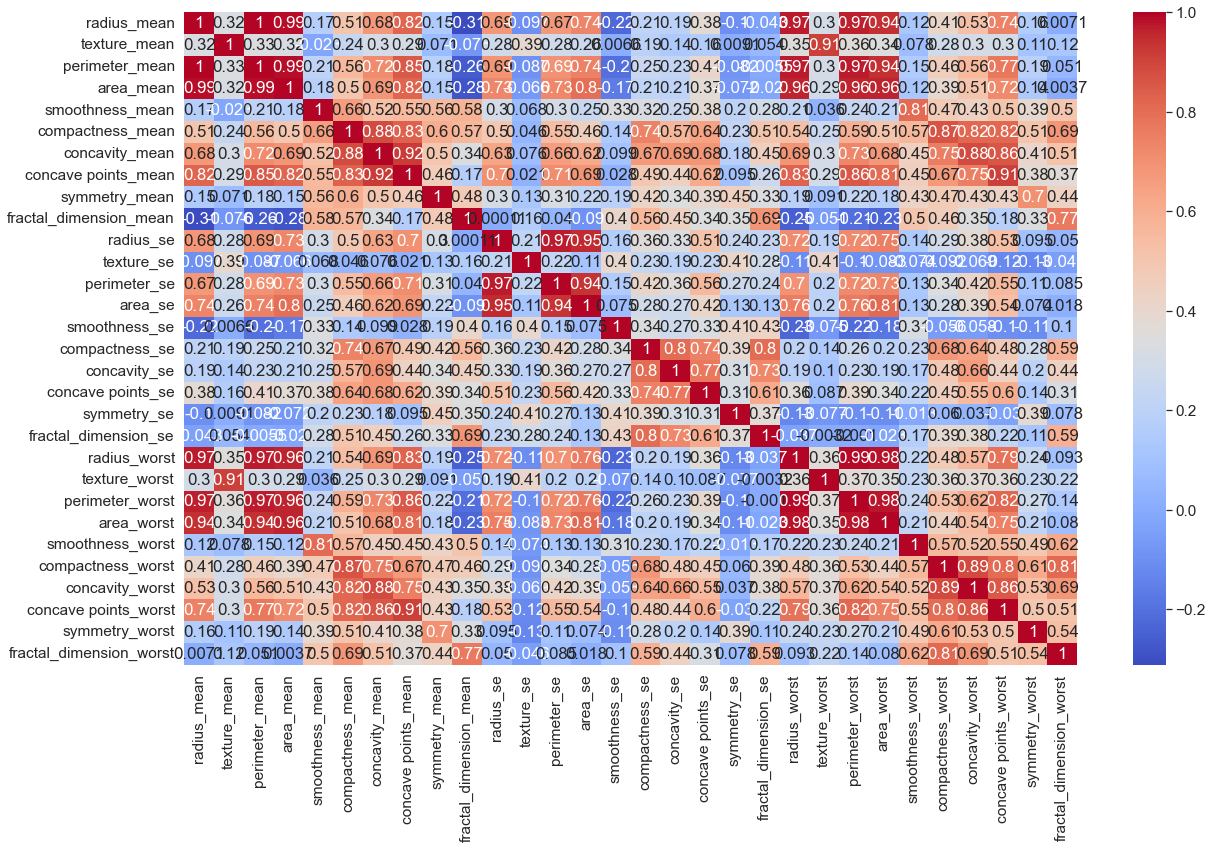

In \[17\]:

    s.heatmap(df.corr(),annot = True)

Out\[17\]:

    <AxesSubplot:>

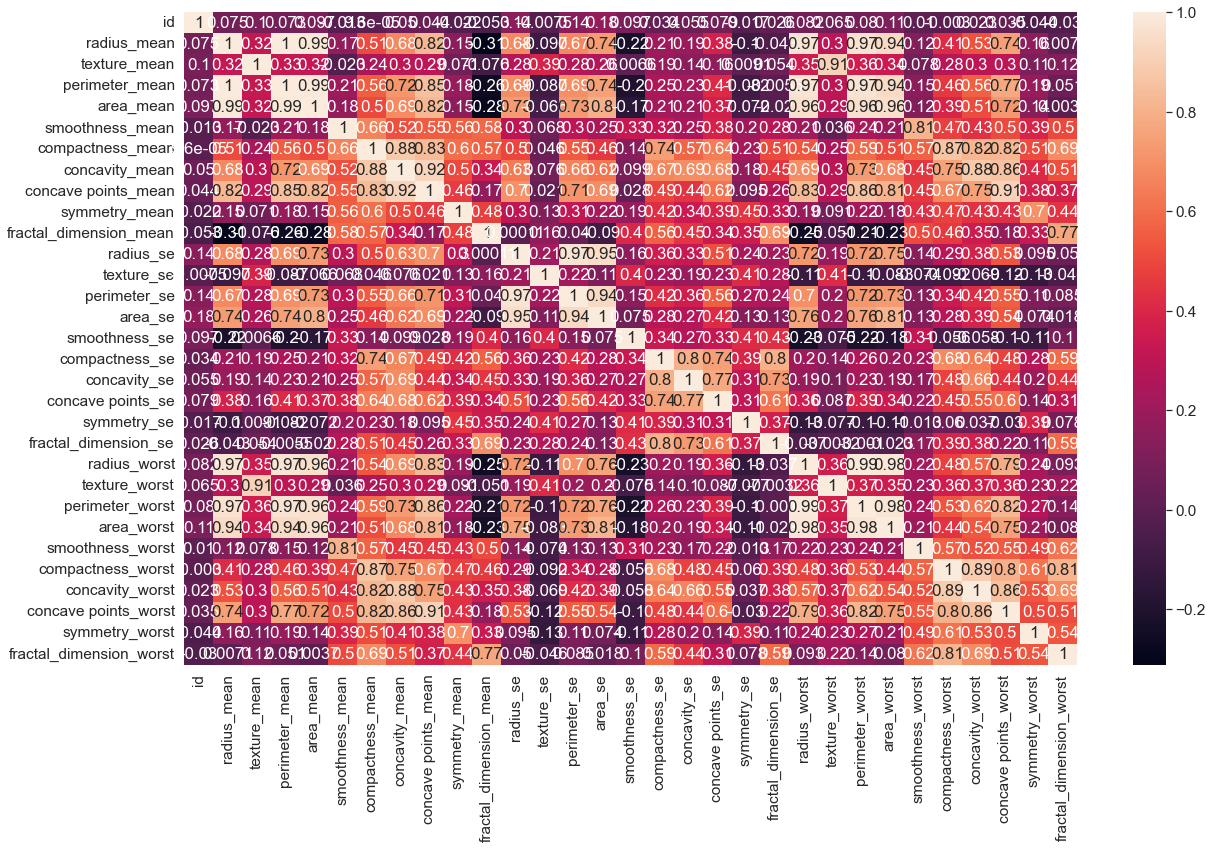

In \[18\]:

    df.shape

Out\[18\]:

    (569, 32)

In \[19\]:

    plt.rcParams['figure.figsize']=(20,8)
    f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
    s.boxplot ('diagnosis', y = 'radius_mean',data = df , ax = ax1)
    s.boxplot ('diagnosis', y = 'texture_mean',data = df , ax = ax2)
    s.boxplot ('diagnosis', y = 'perimeter_mean',data = df , ax = ax3)
    s.boxplot ('diagnosis', y = 'area_mean',data = df , ax = ax4)
    s.boxplot ('diagnosis', y = 'smoothness_mean',data = df , ax = ax5)
    f .tight_layout()

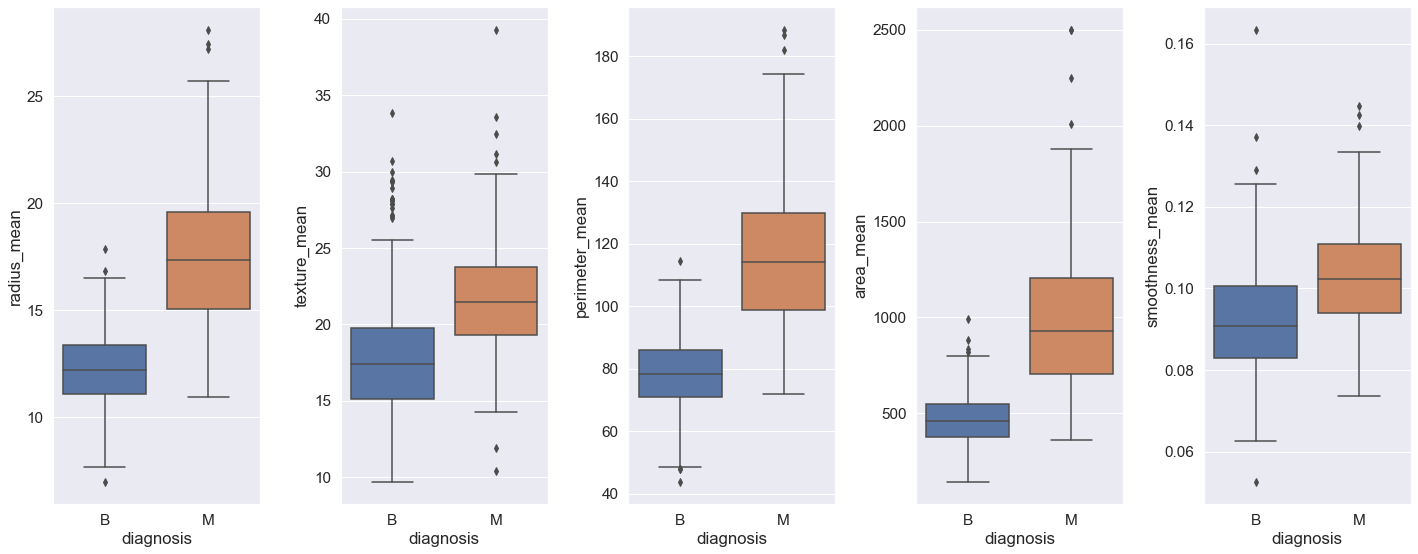

In \[20\]:

    f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
    s.boxplot ('diagnosis', y = 'compactness_mean',data = df , ax = ax1)
    s.boxplot ('diagnosis', y = 'concavity_mean',data = df , ax = ax2)
    s.boxplot ('diagnosis', y = 'concave points_mean',data = df , ax = ax3)
    s.boxplot ('diagnosis', y = 'symmetry_mean',data = df , ax = ax4)
    s.boxplot ('diagnosis', y = 'fractal_dimension_mean',data = df , ax = ax5)
    f .tight_layout()

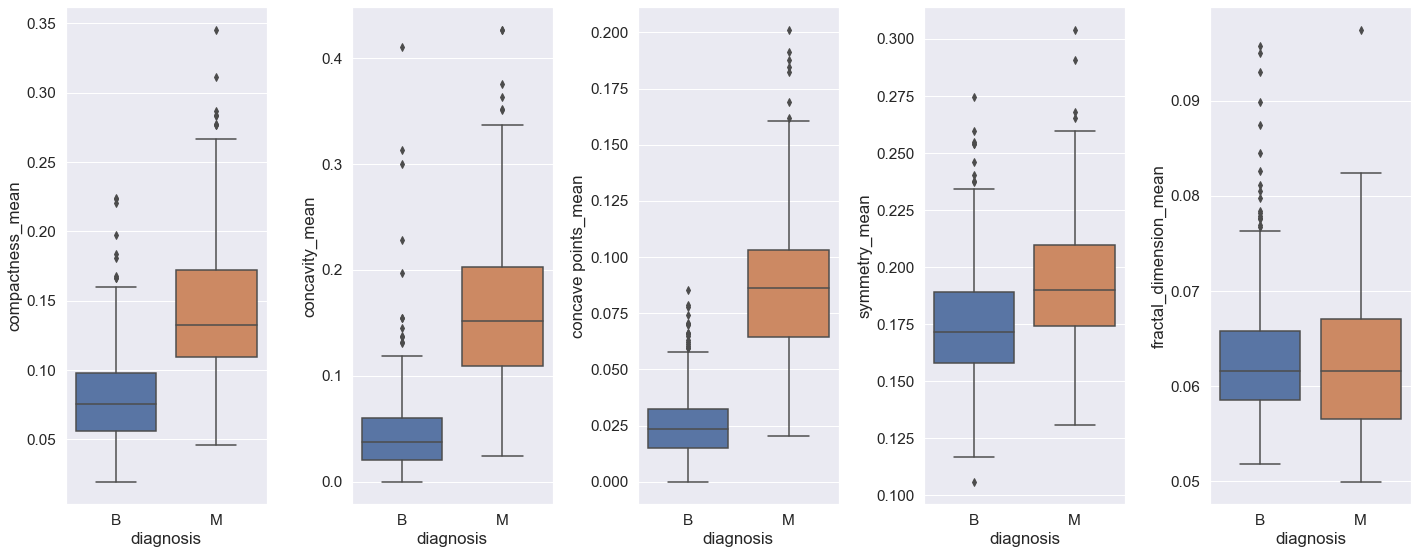

In \[21\]:

    g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
    g.map (s.distplot, "radius_mean", hist = False, rug = True)

    g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
    g.map (s.distplot, 'texture_mean', hist = False, rug = True)

    g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
    g.map (s.distplot, 'perimeter_mean', hist = False, rug = True)

    g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
    g.map (s.distplot, "area_mean", hist = False, rug = True)

    g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
    g.map (s.distplot, "smoothness_mean", hist = False, rug = True)

    g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
    g.map (s.distplot, "compactness_mean", hist = False, rug = True)

    g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
    g.map (s.distplot, "concavity_mean", hist = False, rug = True)

    g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
    g.map (s.distplot, "concave points_mean", hist = False, rug = True)

    g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
    g.map (s.distplot, "symmetry_mean", hist = False, rug = True)

    g = s.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
    g.map (s.distplot, "fractal_dimension_mean", hist = False, rug = True)

Out\[21\]:

    <seaborn.axisgrid.FacetGrid at 0x2d00737deb0>

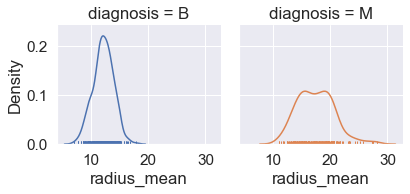

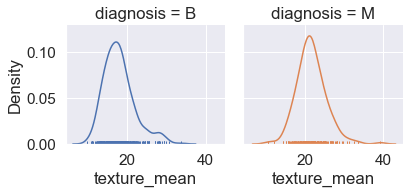

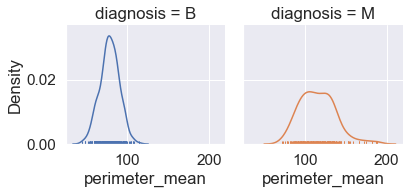

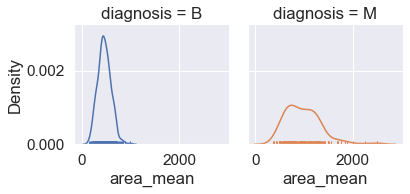

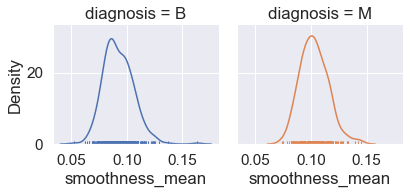

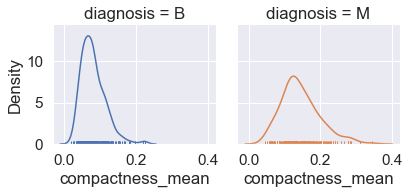

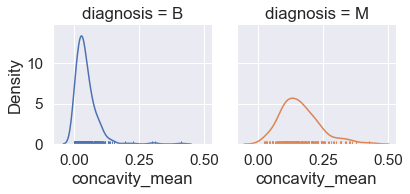

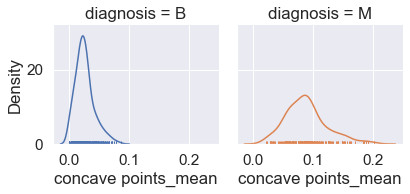

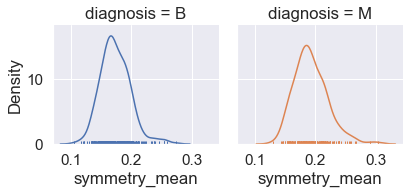

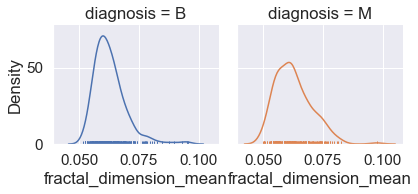

In \[22\]:

    plt.rcParams['figure.figsize']=(20,8)
    f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
    s.boxplot ('diagnosis', y = 'radius_se',data = df , ax = ax1,palette = 'cubehelix')
    s.boxplot ('diagnosis', y = 'texture_se',data = df , ax = ax2,palette = 'cubehelix')
    s.boxplot ('diagnosis', y = 'perimeter_se',data = df , ax = ax3,palette = 'cubehelix')
    s.boxplot ('diagnosis', y = 'area_se',data = df , ax = ax4,palette = 'cubehelix')
    s.boxplot ('diagnosis', y = 'smoothness_se',data = df , ax = ax5,palette = 'cubehelix')
    f .tight_layout()

    f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
    s.boxplot ('diagnosis', y = 'compactness_se',data = df , ax = ax1,palette = 'cubehelix')
    s.boxplot ('diagnosis', y = 'concavity_se',data = df , ax = ax2,palette = 'cubehelix')
    s.boxplot ('diagnosis', y = 'concave points_se',data = df , ax = ax3,palette = 'cubehelix')
    s.boxplot ('diagnosis', y = 'symmetry_se',data = df , ax = ax4,palette = 'cubehelix')
    s.boxplot ('diagnosis', y = 'fractal_dimension_se',data = df , ax = ax5,palette = 'cubehelix')
    f .tight_layout()

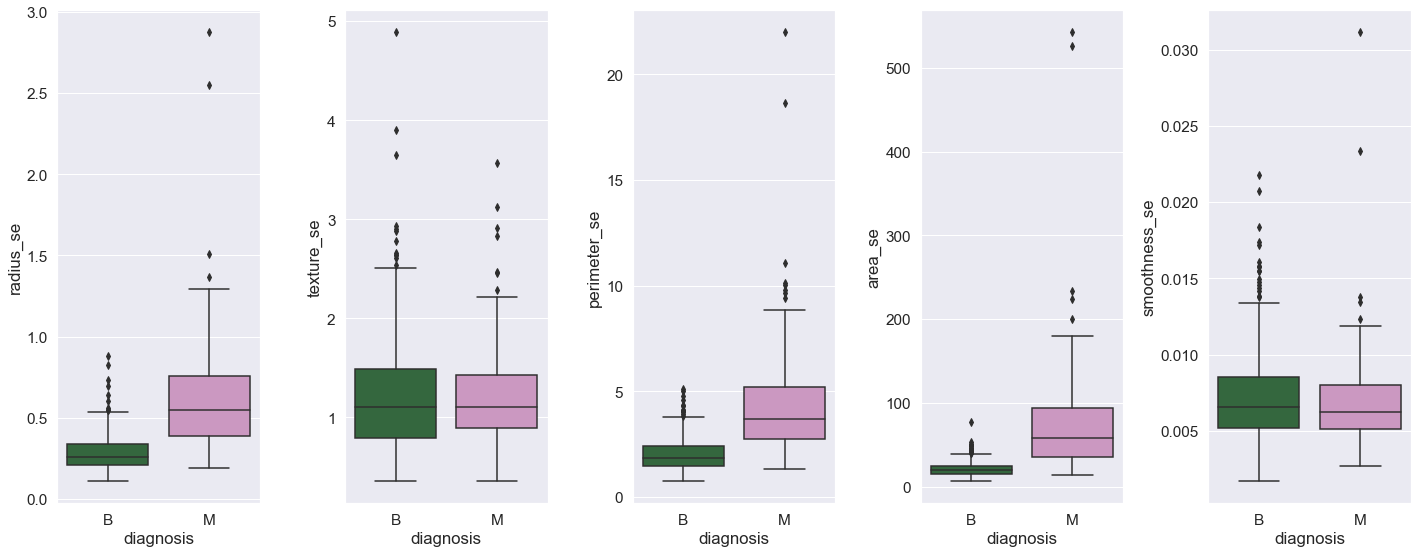

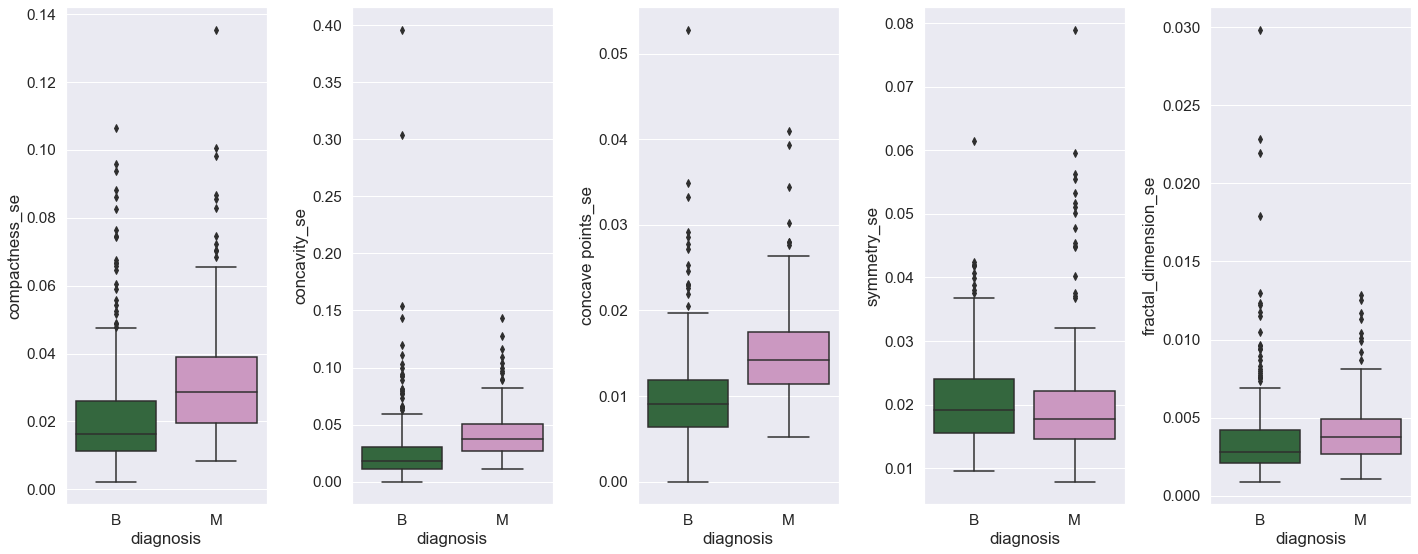

In \[23\]:

    plt.rcParams['figure.figsize']=(20,8)
    f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
    s.boxplot ('diagnosis', y = 'radius_worst',data = df , ax = ax1,palette = 'coolwarm')
    s.boxplot ('diagnosis', y = 'texture_worst',data = df , ax = ax2,palette = 'coolwarm')
    s.boxplot ('diagnosis', y = 'perimeter_worst',data = df , ax = ax3,palette = 'coolwarm')
    s.boxplot ('diagnosis', y = 'area_worst',data = df , ax = ax4,palette = 'coolwarm')
    s.boxplot ('diagnosis', y = 'smoothness_worst',data = df , ax = ax5,palette = 'coolwarm')
    f .tight_layout()

    f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
    s.boxplot ('diagnosis', y = 'compactness_worst',data = df , ax = ax1,palette = 'coolwarm')
    s.boxplot ('diagnosis', y = 'concavity_worst',data = df , ax = ax2,palette = 'coolwarm')
    s.boxplot ('diagnosis', y = 'concave points_worst',data = df , ax = ax3,palette = 'coolwarm')
    s.boxplot ('diagnosis', y = 'symmetry_worst',data = df , ax = ax4,palette = 'coolwarm')
    s.boxplot ('diagnosis', y = 'fractal_dimension_worst',data = df , ax = ax5,palette = 'coolwarm')
    f .tight_layout()

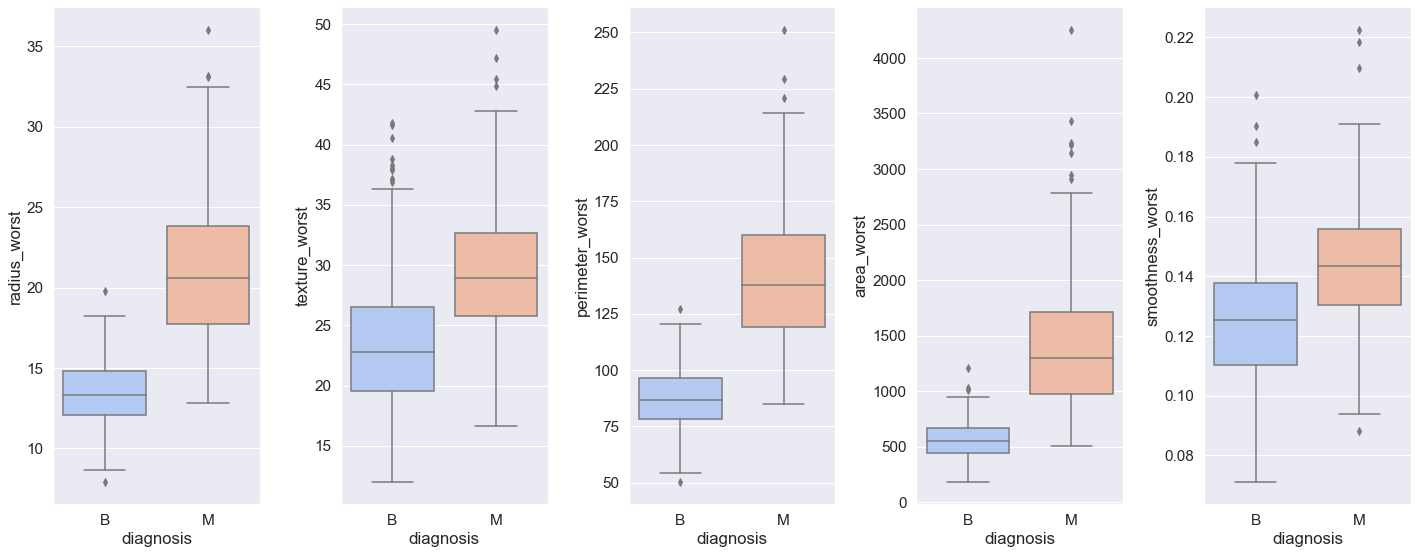

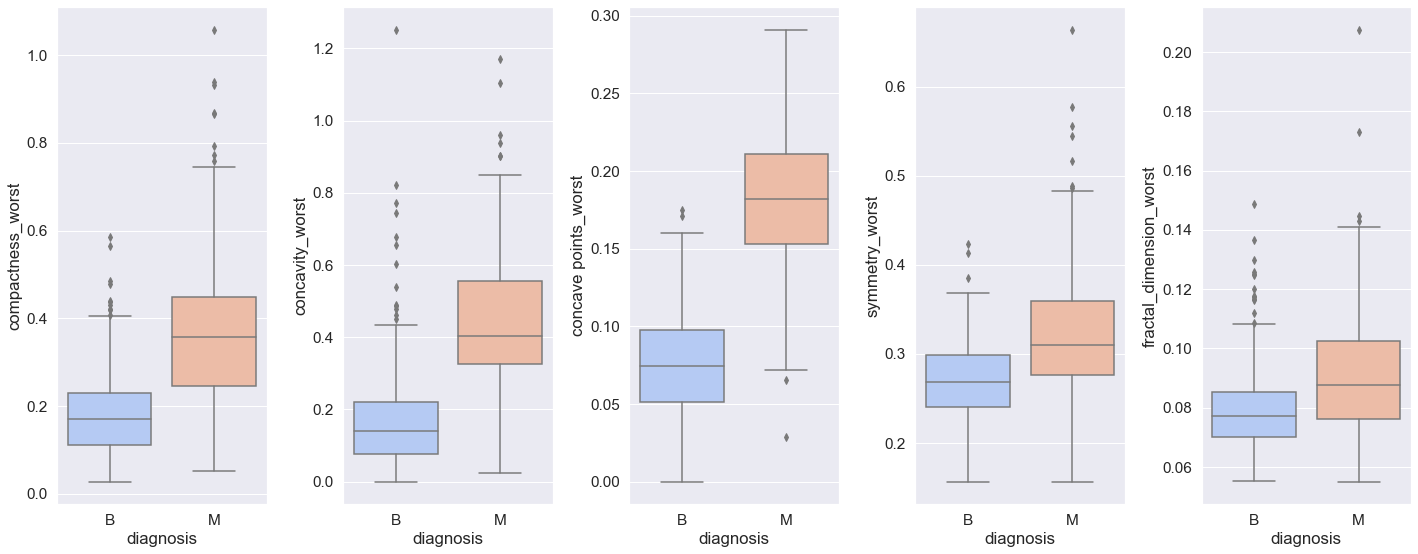

In \[24\]:

    x_norm = df_norm.drop (labels= 'diagnosis', axis =1 )
    y_norm = df_norm ['diagnosis']
    col = x_norm. columns
    print (col)
    display (x_norm)
    display (y_norm)

    Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
           'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst'],
          dtype='object')

|     | id        | radius_mean | texture_mean | perimeter_mean | area_mean | smoothness_mean | compactness_mean | concavity_mean | concave points_mean | symmetry_mean | ... | radius_worst | texture_worst | perimeter_worst | area_worst | smoothness_worst | compactness_worst | concavity_worst | concave points_worst | symmetry_worst | fractal_dimension_worst |
|-----|-----------|-------------|--------------|----------------|-----------|-----------------|------------------|----------------|---------------------|---------------|-----|--------------|---------------|-----------------|------------|------------------|-------------------|-----------------|----------------------|----------------|-------------------------|
| 0   | -0.032403 | 0.182815    | -0.301307    | 0.213053       | 0.146813  | 0.198968        | 0.531437         | 0.495081       | 0.487976            | 0.306758      | ... | 0.324113     | -0.222474     | 0.385173        | 0.279792   | 0.196998         | 0.399079          | 0.351207        | 0.518192             | 0.335156       | 0.229268                |
| 1   | -0.032403 | 0.304923    | -0.051392    | 0.282848       | 0.284671  | -0.104905       | -0.078833        | -0.004450      | 0.105621            | 0.000193      | ... | 0.310239     | -0.060427     | 0.256680        | 0.264308   | -0.056585        | -0.065649         | -0.024432       | 0.245339             | -0.029717      | 0.033282                |
| 2   | 0.059177  | 0.263274    | 0.066295     | 0.262808       | 0.232497  | 0.119524        | 0.170416         | 0.254453       | 0.392549            | 0.129991      | ... | 0.259723     | -0.003924     | 0.225304        | 0.203602   | 0.079452         | 0.165163          | 0.142341        | 0.441216             | 0.140399       | 0.023837                |
| 3   | 0.059229  | -0.128132   | 0.036874     | -0.099434      | -0.114014 | 0.416536        | 0.550761         | 0.357546       | 0.279726            | 0.396657      | ... | -0.048353    | 0.021929      | -0.041791       | -0.076898  | 0.511335         | 0.593799          | 0.331239        | 0.491044             | 0.736693       | 0.584115                |
| 4   | 0.059241  | 0.291671    | -0.167388    | 0.298051       | 0.272369  | 0.035567        | 0.087292         | 0.255859       | 0.275253            | -0.001323     | ... | 0.223081     | -0.240065     | 0.223810        | 0.170669   | 0.033226         | -0.047797         | 0.102086        | 0.164583             | -0.105806      | -0.047001               |
| ... | ...       | ...         | ...          | ...            | ...       | ...             | ...              | ...            | ...                 | ...           | ... | ...          | ...           | ...             | ...        | ...              | ...               | ...             | ...                  | ...            | ...                     |
| 564 | -0.032311 | 0.351778    | 0.104848     | 0.345733       | 0.349570  | 0.132163        | 0.035455         | 0.363404       | 0.447221            | -0.043242     | ... | 0.326603     | 0.019264      | 0.293036        | 0.281758   | 0.056999         | -0.041685         | 0.110632        | 0.367676             | -0.165731      | -0.083929               |
| 565 | -0.032311 | 0.284098    | 0.303022     | 0.271101       | 0.257099  | 0.012997        | -0.002886        | 0.129336       | 0.243493            | -0.030110     | ... | 0.263992     | 0.335095      | 0.237755        | 0.209009   | -0.104131        | -0.060216         | 0.039386        | 0.165614             | -0.064805      | -0.115281               |
| 566 | -0.032310 | 0.117029    | 0.297273     | 0.112853       | 0.086198  | -0.106620       | -0.006260        | 0.008694       | 0.020382            | -0.111929     | ... | 0.096436     | 0.225021      | 0.096812        | 0.059825   | -0.121961        | 0.053492          | 0.054402        | 0.093449             | -0.134586      | -0.037687               |
| 567 | -0.032310 | 0.306342    | 0.339545     | 0.332603       | 0.258796  | 0.193552        | 0.529596         | 0.615278       | 0.512330            | 0.295647      | ... | 0.336920     | 0.366279      | 0.385173        | 0.231129   | 0.215488         | 0.595546          | 0.532357        | 0.516817             | 0.233835       | 0.262719                |
| 568 | -0.033226 | -0.301353   | 0.177557     | -0.304395      | -0.201013 | -0.394785       | -0.186249        | -0.208058      | -0.243137           | -0.113444     | ... | -0.242376    | 0.125074      | -0.239560       | -0.150409  | -0.280054        | -0.184169         | -0.217403       | -0.393836            | -0.005866      | -0.088914               |

569 rows × 31 columns

    0      M
    1      M
    2      M
    3      M
    4      M
          ..
    564    M
    565    M
    566    M
    567    M
    568    B
    Name: diagnosis, Length: 569, dtype: category
    Categories (2, object): ['B', 'M']

In \[25\]:

    le = LabelEncoder()
    le.fit (y_norm)
    y_norm = le.transform(y_norm)
    y_norm = pd.DataFrame(y_norm)
    print (y_norm)

         0
    0    1
    1    1
    2    1
    3    1
    4    1
    ..  ..
    564  1
    565  1
    566  1
    567  1
    568  0

    [569 rows x 1 columns]

In \[26\]:

    def FitModel (X,Y, algo_name , algorithm, gridSearchParams, cv):
        np.random.seed(10)
        x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size = 0.2)
        grid = GridSearchCV(estimator = algorithm, param_grid = gridSearchParams,
                            cv = cv, scoring = 'accuracy', verbose = 1 , n_jobs = -1 )
        grid_result = grid.fit(x_train, y_train)
        best_params = grid_result.best_params_
        pred = grid_result.predict (x_test)
        cm = confusion_matrix (y_test,pred)
        
        print (pred)
        pickle.dump(grid_result,open(algo_name,'wb'))
        
        print ('Best Params :', best_params)
        print ('Classification Report:',classification_report(y_test,pred))
        print ('Accuracy Score', (accuracy_score(y_test,pred)))
        print ('Confusion Matrix :\n',cm)
            

In \[27\]:

    #cv = cross validation 
    param = {
                'C': [0.1,1,100,1000],
                'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
             }

    FitModel (x_norm,y_norm,'SVC',SVC(), param, cv =10)

    Fitting 10 folds for each of 36 candidates, totalling 360 fits
    [1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
     0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
     0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
     0 1 1]
    Best Params : {'C': 1, 'gamma': 1}
    Classification Report:               precision    recall  f1-score   support

               0       1.00      0.96      0.98        75
               1       0.93      1.00      0.96        39

        accuracy                           0.97       114
       macro avg       0.96      0.98      0.97       114
    weighted avg       0.98      0.97      0.97       114

    Accuracy Score 0.9736842105263158
    Confusion Matrix :
     [[72  3]
     [ 0 39]]

In \[28\]:

    param = { 'n_estimators': [100,500,1000,2000]  }
    FitModel (x_norm,y_norm,'Random Forest',RandomForestClassifier(), param, cv =10)

    Fitting 10 folds for each of 4 candidates, totalling 40 fits
    [1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
     0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
     0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
     0 1 1]
    Best Params : {'n_estimators': 100}
    Classification Report:               precision    recall  f1-score   support

               0       1.00      0.97      0.99        75
               1       0.95      1.00      0.97        39

        accuracy                           0.98       114
       macro avg       0.98      0.99      0.98       114
    weighted avg       0.98      0.98      0.98       114

    Accuracy Score 0.9824561403508771
    Confusion Matrix :
     [[73  2]
     [ 0 39]]

In \[29\]:

    np.random.seed(10)
    x_train,x_test, y_train,y_test = train_test_split (x_norm,y_norm,test_size = 0.2)
    forest = RandomForestClassifier (n_estimators = 100)
    fit = forest.fit (x_train, y_train)
    accuracy = fit.score(x_test,y_test)
    predict = fit.predict(x_test)
    cmatrix = confusion_matrix (y_test, predict)
    print ('Classification Report:',classification_report(y_test,predict))
    print ('Accuracy Score', (accuracy_score(y_test,predict)))
    print ('Accuracy of Random Forest ', (accuracy))
    print ('Confusion Matrix :\n',cmatrix)

    Classification Report:               precision    recall  f1-score   support

               0       1.00      0.97      0.99        75
               1       0.95      1.00      0.97        39

        accuracy                           0.98       114
       macro avg       0.98      0.99      0.98       114
    weighted avg       0.98      0.98      0.98       114

    Accuracy Score 0.9824561403508771
    Accuracy of Random Forest  0.9824561403508771
    Confusion Matrix :
     [[73  2]
     [ 0 39]]

In \[30\]:

    param = { 'n_estimators': [100,500,1000,2000]  }
    FitModel (x_norm,y_norm,'XGBoost', XGBClassifier(),param, cv = 10)

    Fitting 10 folds for each of 4 candidates, totalling 40 fits
    [18:07:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    [1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
     0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
     0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
     0 1 1]
    Best Params : {'n_estimators': 100}
    Classification Report:               precision    recall  f1-score   support

               0       0.99      0.97      0.98        75
               1       0.95      0.97      0.96        39

        accuracy                           0.97       114
       macro avg       0.97      0.97      0.97       114
    weighted avg       0.97      0.97      0.97       114

    Accuracy Score 0.9736842105263158
    Confusion Matrix :
     [[73  2]
     [ 1 38]]

In \[31\]:

    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]

    print ("Feature Ranking:")
    for f in range (x.shape[1]):
        print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))

    Feature Ranking:
    Feature id (0.150945)
    Feature radius_mean (0.147095)
    Feature texture_mean (0.113748)
    Feature perimeter_mean (0.088457)
    Feature area_mean (0.066710)
    Feature smoothness_mean (0.060232)
    Feature compactness_mean (0.057638)
    Feature concavity_mean (0.047305)
    Feature concave points_mean (0.044329)
    Feature symmetry_mean (0.038746)
    Feature fractal_dimension_mean (0.020189)
    Feature radius_se (0.018761)
    Feature texture_se (0.018165)
    Feature perimeter_se (0.016167)
    Feature area_se (0.012378)
    Feature smoothness_se (0.011273)
    Feature compactness_se (0.009234)
    Feature concavity_se (0.009120)
    Feature concave points_se (0.008477)
    Feature symmetry_se (0.006638)
    Feature fractal_dimension_se (0.006522)
    Feature radius_worst (0.006470)
    Feature texture_worst (0.006180)
    Feature perimeter_worst (0.005700)
    Feature area_worst (0.005407)
    Feature smoothness_worst (0.004558)
    Feature compactness_worst (0.004272)
    Feature concavity_worst (0.004184)
    Feature concave points_worst (0.003816)
    Feature symmetry_worst (0.003815)
    Feature fractal_dimension_worst (0.003470)

In \[32\]:

    feat_imp = pd.DataFrame({'Feature': list(x), 'Gini importance': importances[indices]})
    plt.rcParams['figure.figsize']= (12,12)
    s.set_style ('whitegrid')
    ax= s.barplot(x ='Gini importance', y = 'Feature', data = feat_imp  )
    ax.set (xlabel = 'Gini Importances')
    plt.show()

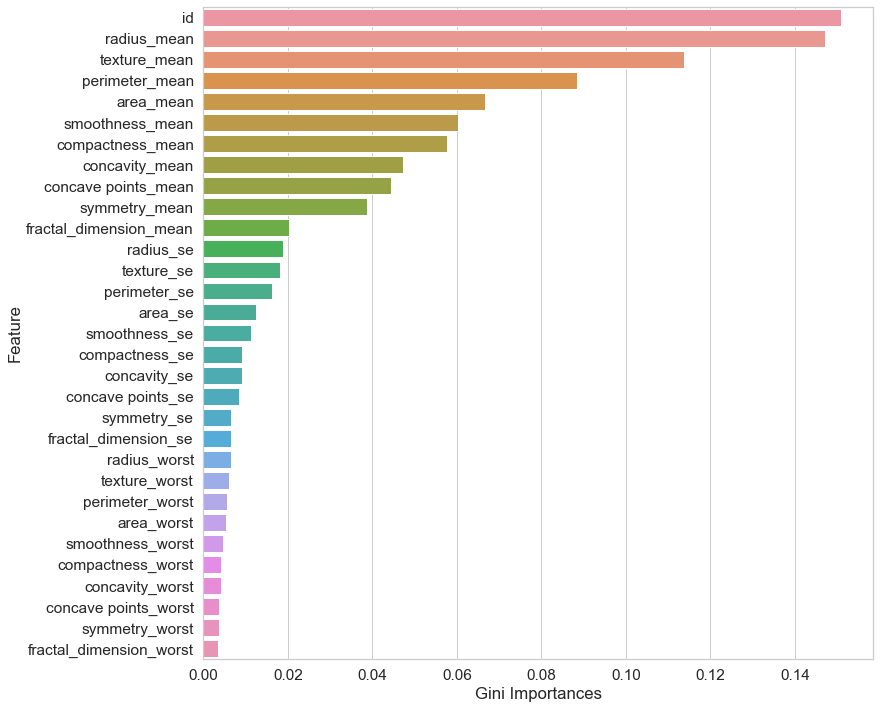

In \[33\]:

    from imblearn.over_sampling import SMOTE

In \[34\]:

    df['diagnosis'].value_counts()

Out\[34\]:

    B    357
    M    212
    Name: diagnosis, dtype: int64

In \[35\]:

    sm = SMOTE(random_state =42)
    X_res, Y_res = sm.fit_resample (x_norm, y_norm)

In \[36\]:

    Y_res[0].value_counts()

Out\[36\]:

    1    357
    0    357
    Name: 0, dtype: int64

In \[37\]:

    param = { 'n_estimators': [100,500,1000,2000]  }
    FitModel (X_res, Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10)

    Fitting 10 folds for each of 4 candidates, totalling 40 fits
    [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
     1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
     1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
     0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
    Best Params : {'n_estimators': 100}
    Classification Report:               precision    recall  f1-score   support

               0       1.00      0.97      0.99        68
               1       0.97      1.00      0.99        75

        accuracy                           0.99       143
       macro avg       0.99      0.99      0.99       143
    weighted avg       0.99      0.99      0.99       143

    Accuracy Score 0.986013986013986
    Confusion Matrix :
     [[66  2]
     [ 0 75]]

In \[38\]:

    param = {
                'C': [0.1,1,100,1000],
                'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
             }
    FitModel (X_res, Y_res,'SVC',SVC(), param, cv =10)

    Fitting 10 folds for each of 36 candidates, totalling 360 fits
    [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
     1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
     1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
     0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
    Best Params : {'C': 1, 'gamma': 1}
    Classification Report:               precision    recall  f1-score   support

               0       1.00      0.97      0.99        68
               1       0.97      1.00      0.99        75

        accuracy                           0.99       143
       macro avg       0.99      0.99      0.99       143
    weighted avg       0.99      0.99      0.99       143

    Accuracy Score 0.986013986013986
    Confusion Matrix :
     [[66  2]
     [ 0 75]]

In \[39\]:

    param = { 'n_estimators': [100,500,1000,2000]  }
    FitModel (X_res, Y_res,'XGBoost', XGBClassifier(),param, cv = 10)

    Fitting 10 folds for each of 4 candidates, totalling 40 fits
    [18:08:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    [1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
     1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
     1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
     0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
    Best Params : {'n_estimators': 100}
    Classification Report:               precision    recall  f1-score   support

               0       1.00      0.99      0.99        68
               1       0.99      1.00      0.99        75

        accuracy                           0.99       143
       macro avg       0.99      0.99      0.99       143
    weighted avg       0.99      0.99      0.99       143

    Accuracy Score 0.993006993006993
    Confusion Matrix :
     [[67  1]
     [ 0 75]]

In \[40\]:

    feat_imp.index = feat_imp.Feature
    feat_imp.index 

Out\[40\]:

    Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
           'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst'],
          dtype='object', name='Feature')

In \[41\]:

    feat_to_keep = feat_imp.iloc[1:15].index
    type(feat_to_keep),feat_to_keep

Out\[41\]:

    (pandas.core.indexes.base.Index,
     Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
            'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'perimeter_se', 'area_se'],
           dtype='object', name='Feature'))

In \[42\]:

    X_res = pd.DataFrame(X_res)
    Y_res = pd.DataFrame(Y_res)
    X_res.columns = x_norm.columns
    param = { 'n_estimators': [100,500,1000,2000]  }
    FitModel (X_res [feat_to_keep], Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10)

    Fitting 10 folds for each of 4 candidates, totalling 40 fits
    [1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
     1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0
     1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
     0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
    Best Params : {'n_estimators': 100}
    Classification Report:               precision    recall  f1-score   support

               0       0.98      0.96      0.97        68
               1       0.96      0.99      0.97        75

        accuracy                           0.97       143
       macro avg       0.97      0.97      0.97       143
    weighted avg       0.97      0.97      0.97       143

    Accuracy Score 0.972027972027972
    Confusion Matrix :
     [[65  3]
     [ 1 74]]

In \[43\]:

    param = {
                'C': [0.1,1,100,1000],
                'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
             }
    FitModel (X_res [feat_to_keep], Y_res,'SVC',SVC(), param, cv =5)

    Fitting 5 folds for each of 36 candidates, totalling 180 fits
    [1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
     1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0
     1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
     0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0]
    Best Params : {'C': 100, 'gamma': 10}
    Classification Report:               precision    recall  f1-score   support

               0       1.00      0.94      0.97        68
               1       0.95      1.00      0.97        75

        accuracy                           0.97       143
       macro avg       0.97      0.97      0.97       143
    weighted avg       0.97      0.97      0.97       143

    Accuracy Score 0.972027972027972
    Confusion Matrix :
     [[64  4]
     [ 0 75]]

In \[44\]:

    param = { 'n_estimators': [100,500,1000,2000]  }
    FitModel (X_res [feat_to_keep], Y_res,'XGBoost', XGBClassifier(),param, cv = 5)

    Fitting 5 folds for each of 4 candidates, totalling 20 fits
    [18:08:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    [1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
     1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0
     1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
     0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
    Best Params : {'n_estimators': 100}
    Classification Report:               precision    recall  f1-score   support

               0       0.99      0.97      0.98        68
               1       0.97      0.99      0.98        75

        accuracy                           0.98       143
       macro avg       0.98      0.98      0.98       143
    weighted avg       0.98      0.98      0.98       143

    Accuracy Score 0.9790209790209791
    Confusion Matrix :
     [[66  2]
     [ 1 74]]

In \[45\]:

    param = { 'n_estimators': [100,500,1000,2000]  }
    FitModel (X_res, Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10) 

    Fitting 10 folds for each of 4 candidates, totalling 40 fits
    [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
     1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
     1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
     0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
    Best Params : {'n_estimators': 500}
    Classification Report:               precision    recall  f1-score   support

               0       1.00      0.97      0.99        68
               1       0.97      1.00      0.99        75

        accuracy                           0.99       143
       macro avg       0.99      0.99      0.99       143
    weighted avg       0.99      0.99      0.99       143

    Accuracy Score 0.986013986013986
    Confusion Matrix :
     [[66  2]
     [ 0 75]]

In \[46\]:

    param = {
                'C': [0.1,1,100,1000],
                'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
             }
    FitModel (X_res, Y_res,'SVC',SVC(), param, cv =10)

    Fitting 10 folds for each of 36 candidates, totalling 360 fits
    [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
     1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
     1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
     0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
    Best Params : {'C': 1, 'gamma': 1}
    Classification Report:               precision    recall  f1-score   support

               0       1.00      0.97      0.99        68
               1       0.97      1.00      0.99        75

        accuracy                           0.99       143
       macro avg       0.99      0.99      0.99       143
    weighted avg       0.99      0.99      0.99       143

    Accuracy Score 0.986013986013986
    Confusion Matrix :
     [[66  2]
     [ 0 75]]

In \[47\]:

    param = { 'n_estimators': [100,500,1000,2000]  }
    FitModel (X_res, Y_res,'XGBoost', XGBClassifier(),param, cv = 10)

    Fitting 10 folds for each of 4 candidates, totalling 40 fits
    [18:09:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    [1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
     1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
     1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
     0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0]
    Best Params : {'n_estimators': 100}
    Classification Report:               precision    recall  f1-score   support

               0       1.00      0.99      0.99        68
               1       0.99      1.00      0.99        75

        accuracy                           0.99       143
       macro avg       0.99      0.99      0.99       143
    weighted avg       0.99      0.99      0.99       143

    Accuracy Score 0.993006993006993
    Confusion Matrix :
     [[67  1]
     [ 0 75]]

In \[48\]:

    load_model =pickle.load(open("XGBoost","rb"))

In \[49\]:

    pred1 = load_model.predict (x_test)
    pred1

Out\[49\]:

    array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
           0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
           0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
           0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
           0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
           0, 0, 1, 1])

In \[50\]:

    load_model.best_params_

Out\[50\]:

    {'n_estimators': 100}

In \[51\]:

    print (accuracy_score (pred1,y_test))

    0.9912280701754386

In \[52\]:

    load_model =pickle.load(open("SVC","rb"))
    pred1 = load_model.predict (x_test)
    print (load_model.best_params_)
    print (accuracy_score (pred1,y_test))
    display (pred1)

    {'C': 1, 'gamma': 1}
    0.9912280701754386

    array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
           0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
           0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
           0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
           0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
           0, 0, 1, 1])

In \[53\]:

    load_model =pickle.load(open("Random Forest","rb"))
    pred1 = load_model.predict (x_test)
    print (load_model.best_params_)
    print (accuracy_score (pred1,y_test))
    display (pred1)

    {'n_estimators': 500}
    0.9912280701754386

    array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
           0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
           0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
           0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
           0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
           0, 0, 1, 1])

In \[ \]:

     

In \[ \]: